<a href="https://colab.research.google.com/github/MahaAlm/RealEstateInRiyadh/blob/main/Interactive%26Heat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

ox.__version__

'1.9.3'

In [ ]:
df2=pd.read_excel('Cleaned_RealestateSale_2023_Q1.xlsx')
df3=pd.read_excel('Cleaned_RealestateSale_2023_Q2.xlsx')

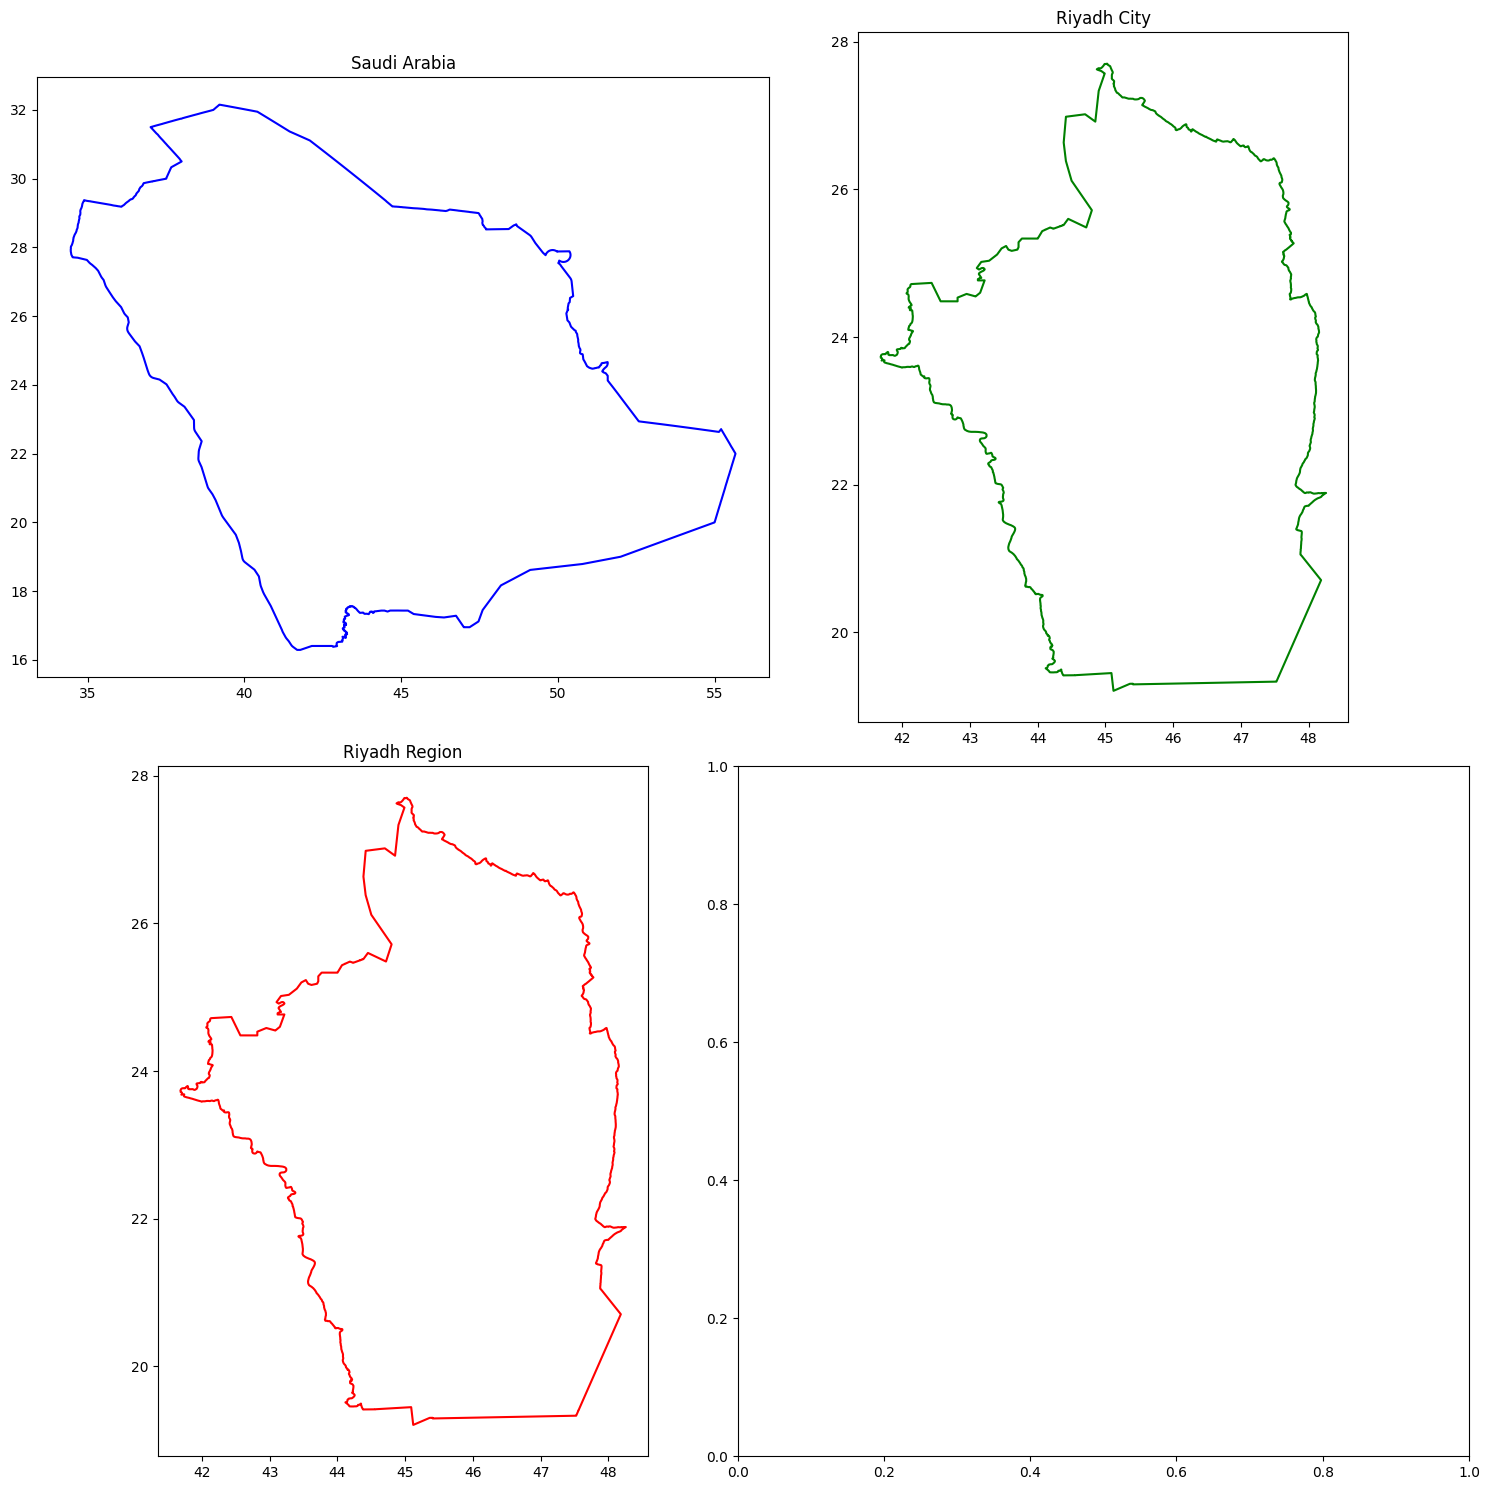

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Example: Country Level
gdf_saudi = ox.geocode_to_gdf("Saudi Arabia")

# Example: City Level
gdf_riyadh = ox.geocode_to_gdf("Riyadh, Saudi Arabia")

# Example: Region Level
gdf_riyadh_region = ox.geocode_to_gdf("Riyadh Region, Saudi Arabia")

# Example: District Level

# Plotting the different geocoded areas
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Plot Saudi Arabia
gdf_saudi.boundary.plot(ax=ax[0, 0], color='blue')
ax[0, 0].set_title('Saudi Arabia')

# Plot Riyadh City
gdf_riyadh.boundary.plot(ax=ax[0, 1], color='green')
ax[0, 1].set_title('Riyadh City')

# Plot Riyadh Region
gdf_riyadh_region.boundary.plot(ax=ax[1, 0], color='red')
ax[1, 0].set_title('Riyadh Region')

# Plot Al Olaya District


plt.tight_layout()
plt.show()


In [ ]:
place = "Al Riyadh, Saudi Arabia"
tags = {"highway": True}
gdf = ox.geocode_to_gdf(place)


In [ ]:
import geopandas as gpd
from shapely.geometry import box, point, polygon
polygon=gdf.iloc[0].geometry
polygon_gdf=gpd.GeoDataFrame([{'geometry':polygon}],crs='EPSG:4326')

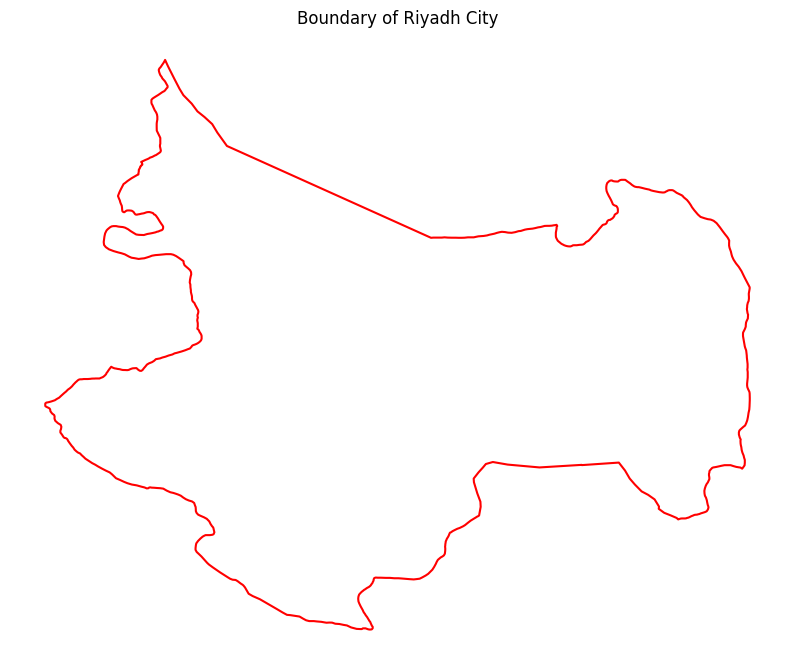

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads

# Load CSV data (ensure the 'geometry' column contains WKT format strings)
riyadh_map = pd.read_csv('riyadh_regions.csv')

# Convert the 'geometry' column from WKT to Shapely geometry
riyadh_map['geometry'] = riyadh_map['geometry'].apply(loads)

# Extract Riyadh geometry
riyadh_polygon = riyadh_map[riyadh_map['shapeName'] == 'Riyadh']['geometry'].iloc[0]

# Create a GeoDataFrame for Riyadh polygon
polygon_gdf = gpd.GeoDataFrame({'geometry': [riyadh_polygon]}, crs='EPSG:4326')

# Plot the boundary to ensure it's correct
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
polygon_gdf.boundary.plot(ax=ax, color='red')
plt.title('Boundary of Riyadh City')
plt.axis('off')
plt.show()


In [ ]:
from shapely.geometry import box

# Define the grid size in kilometers and convert to degrees (approximately 111 km per degree)
grid_size_km = 20
grid_size_deg = grid_size_km / 111.0

# Get the bounding box of the polygon
minx, miny, maxx, maxy = riyadh_polygon.bounds
grid = []

# Create grid cells
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        cell = box(x, y, x + grid_size_deg, y + grid_size_deg)
        if cell.intersects(riyadh_polygon):
            grid.append(cell)
        y += grid_size_deg
    x += grid_size_deg

# Create a GeoDataFrame for the grid
grid_gdf = gpd.GeoDataFrame(grid, columns=['geometry'], crs='EPSG:4326')
clipped_grid_gdf = gpd.clip(grid_gdf, polygon_gdf)



In [ ]:
# Add dummy data to the grid cells
clipped_grid_gdf['dummy_data'] = range(len(clipped_grid_gdf))  # Add sequential dummy data


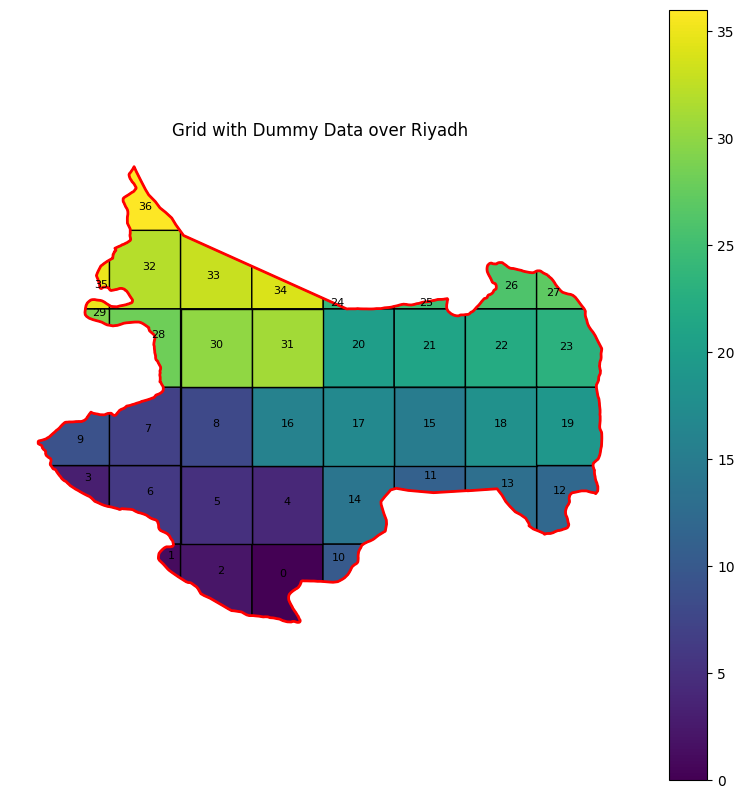

In [ ]:
# Plot the grid with dummy data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
clipped_grid_gdf.plot(column='dummy_data', ax=ax, legend=True, cmap='viridis', edgecolor='black')
polygon_gdf.boundary.plot(ax=ax, color='red', linewidth=2)

# Annotate each cell with its dummy data
for idx, row in clipped_grid_gdf.iterrows():
    plt.annotate(text=row['dummy_data'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Grid with Dummy Data over Riyadh')
plt.axis('off')
plt.show()


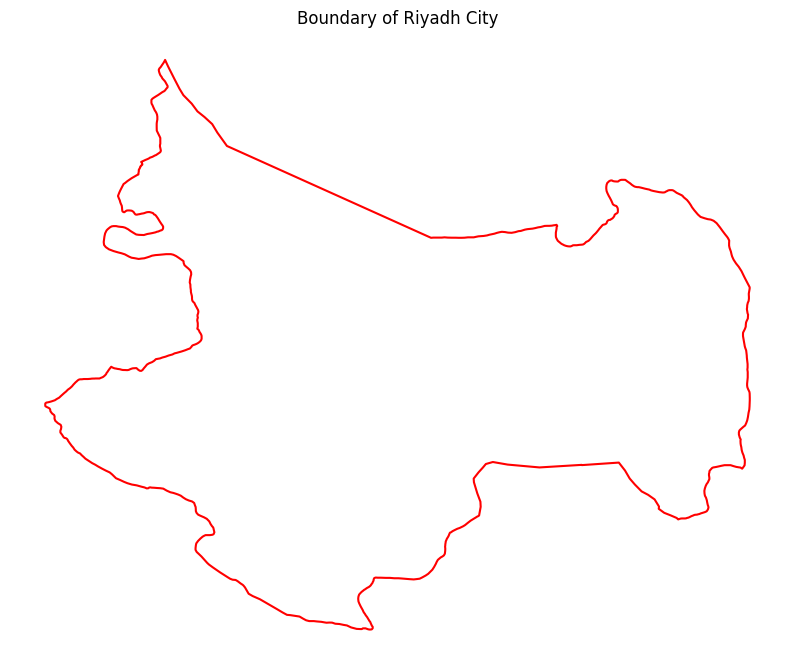

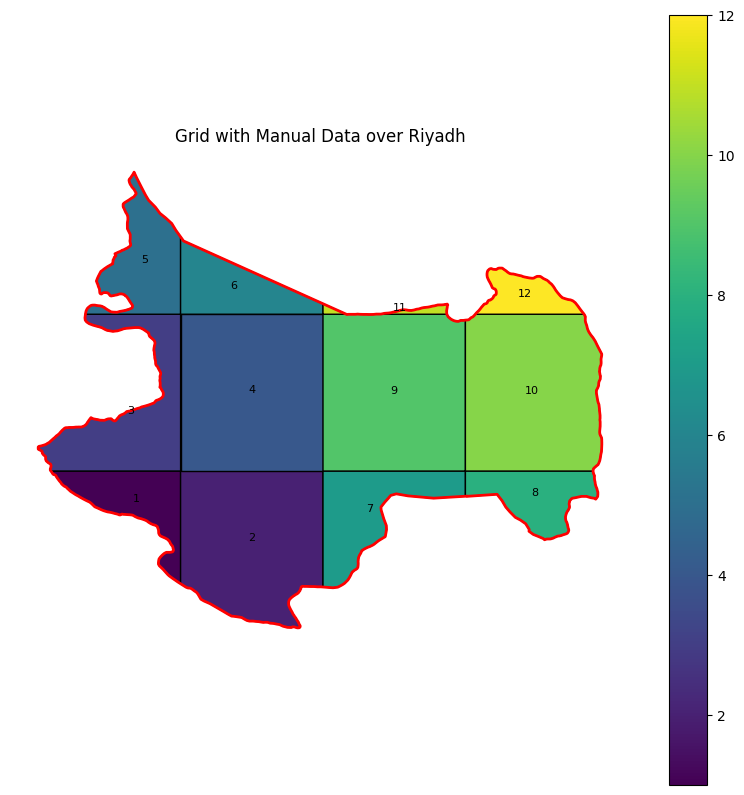

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads

# Load CSV data (ensure the 'geometry' column contains WKT format strings)
riyadh_map = pd.read_csv('riyadh_regions.csv')

# Convert the 'geometry' column from WKT to Shapely geometry
riyadh_map['geometry'] = riyadh_map['geometry'].apply(loads)

# Extract Riyadh geometry
riyadh_polygon = riyadh_map[riyadh_map['shapeName'] == 'Riyadh']['geometry'].iloc[0]

# Create a GeoDataFrame for Riyadh polygon
polygon_gdf = gpd.GeoDataFrame({'geometry': [riyadh_polygon]}, crs='EPSG:4326')

# Plot the boundary to ensure it's correct
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
polygon_gdf.boundary.plot(ax=ax, color='red')
plt.title('Boundary of Riyadh City')
plt.axis('off')
plt.show()

from shapely.geometry import box

# Define the grid size in kilometers and convert to degrees (approximately 111 km per degree)
grid_size_km = 40
grid_size_deg = grid_size_km / 111.0

# Get the bounding box of the polygon
minx, miny, maxx, maxy = riyadh_polygon.bounds
grid = []

# Create grid cells
num_cells=0
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        cell = box(x, y, x + grid_size_deg, y + grid_size_deg)
        if cell.intersects(riyadh_polygon):
            grid.append(cell)
            num_cells+=1
        y += grid_size_deg
    x += grid_size_deg

# Create a GeoDataFrame for the grid
grid_gdf = gpd.GeoDataFrame(grid, columns=['geometry'], crs='EPSG:4326')
clipped_grid_gdf = gpd.clip(grid_gdf, polygon_gdf)

# Create a list of manual values
manual_values = list(range(1, num_cells + 1))  # Example: [1, 2, 3, ..., num_cells]

# Ensure the length of manual_values matches the number of cells
if len(manual_values) != len(clipped_grid_gdf):
    raise ValueError("The number of manual values does not match the number of grid cells")

# Assign manual values to the grid cells
clipped_grid_gdf['manual_data'] = manual_values

# Plot the grid with manual data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
clipped_grid_gdf.plot(column='manual_data', ax=ax, legend=True, cmap='viridis', edgecolor='black')
polygon_gdf.boundary.plot(ax=ax, color='red', linewidth=2)

# Annotate each cell with its manual data
for idx, row in clipped_grid_gdf.iterrows():
    plt.annotate(text=row['manual_data'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Grid with Manual Data over Riyadh')
plt.axis('off')
plt.show()


In [ ]:
#rm.head()

In [ ]:
data=pd.read_csv('cleaned_datamodifiedD_data.csv')
rm=data['regionInRiyadh'].value_counts()
manual_values=[('غرب الرياض',2371),('جنوب الرياض',1328),('غرب الرياض',2371),('وسط الرياض',2986),
               ('غرب الرياض',2371),('شمال الرياض',2482),('جنوب الرياض',1328),('شرق الرياض',856),
               ('وسط الرياض',2986),('شرق الرياض',856),('شمال الرياض',2482),('شرق الرياض',856)]
manual_values
srData=pd.DataFrame(manual_values,columns=['regionInRiyadh','count'])
srData['geometry']=clipped_grid_gdf['geometry']
newDa=srData.iloc[[0, 3, 1, 4, 2, 5, 6, 9, 7, 10, 8, 11]]
srData.head(12)

regionInRiyadh  count                                           geometry
0      غرب الرياض   2371  POLYGON ((46.67715 24.58040, 46.67715 24.32138...
1     جنوب الرياض   1328  POLYGON ((46.67715 24.94076, 46.67715 24.58040...
2      غرب الرياض   2371  POLYGON ((46.67715 24.94076, 46.43638 24.94076...
3      وسط الرياض   2986  POLYGON ((46.67715 24.58040, 47.03751 24.58040...
4      غرب الرياض   2371  POLYGON ((46.67715 24.58040, 46.67715 24.94076...
5     شمال الرياض   2482  POLYGON ((47.03751 24.94076, 46.67715 24.94076...
6     جنوب الرياض   1328  POLYGON ((47.03751 24.58040, 47.39787 24.58040...
7      شرق الرياض    856  POLYGON ((47.39787 24.58040, 47.03751 24.58040...
8      وسط الرياض   2986  MULTIPOLYGON (((47.03751 24.94076, 47.03751 24...
9      شرق الرياض    856  POLYGON ((47.39787 24.58040, 47.72102 24.58040...
10    شمال الرياض   2482  POLYGON ((47.69807 24.94076, 47.69923 24.93922...
11     شرق الرياض    856  POLYGON ((47.42296 24.94076, 47.42641 24.94440...

In [ ]:
data.head()

city/district    dealID dealDate(Georgan) dealDate(Hijri) estateCategory  \
0   الرياض/عريض  20289169        2023/07/01         1444/12           سكني   
1   الرياض/نمار  20289165        2023/07/01         1444/12           سكني   
2  الرياض/الخير  20289297        2023/07/01         1444/12           سكني   
3    الرياض/بدر  20290020        2023/07/02         1444/12           سكني   
4  الرياض/الخير  20290338        2023/07/02         1444/12           سكني   

  estateType  estateQty     price  space sqm district regionInRiyadh  
0   قطعة أرض          1  300000.0      450.0     عريض     وسط الرياض  
1   قطعة أرض          1  430000.0      300.0     نمار    جنوب الرياض  
2   قطعة أرض          1  445000.0      403.0    الخير    شمال الرياض  
3        شقة          1  501600.0      138.3      بدر    جنوب الرياض  
4   قطعة أرض          1  450000.0      412.5    الخير    شمال الرياض

In [91]:
# Mapping of Arabic to English district names based on provided translations and previous mapping
arabic_to_english_mapping = {
  "السويدى": "Al Swaidi",
  "المهدية": "Al Mahdiah",
  "الزهرة": "Alzahrah",
  "الملقا": "Al Malga",
  "الخير": None,
  "النظيم": "Al Natheem",
  "النخيل": "Al Nakheel",
  "شرق الرياض": None,
  "عريض": "Al Ared",
  "طريق الخرج": None,
  "نمار": "Nammar",
  "الملك عبد الله": "Al Malik Abdullah",
  "قرطبة": "Qurtubah",
  "الجنادرية": "Al Jinadiriyah",
  "عرقه": "Irgah",
  "الشفاء": "Shafa",
  "الربيع": "Al Rabia",
  "الجرادية": None,
  "العارض": "Al Ared",
  "الرمال": "Al Rimal",
  "العزيزية": "Al Aziziyah",
  "المرسلات": "Al Mursalat",
  "المعذر": "Al Mather",
  "القدس": "Al Quds",
  "الصحافة": "Al Sahafa",
  "الملز": "Al Malaz",
  "الياسمين": "Al Yasmeen",
  "الدار البيضاء": "Al Dar Al Baidaa",
  "العود": "Al Oud",
  "البديعة": "Al Badiah",
  "عكاظ": "Okadh",
  "لبن": "Laban",
  "الشرفية": "Al Sharafiyah",
  "الشميسى": "Al Shimaisi",
  "الملك فهد": "Al Malik Fahad",
  "المونسية": "Al Mounasiah",
  "النهضة": "Al Nahdah",
  "حطين": "Hitteen",
  "غرناطة": "Ghernata",
  "النرجس": "Al Nargas",
  "اشبيليا": "Ishbayliyah",
  "الحمراء": "Al Hamra",
  "شبرا": "Shobra",
  "الشهداء": "Al Shuhada",
  "العوالي": None,
  "الملك فيصل": "Al Malik Faisal",
  "النسيم": "Al Naseem",
  "ام الحمام": "Um Al Hamam Al Sharqi",
  "القادسية": "Al Qadisiyah",
  "الزهراء": "Al Zahraa",
  "الغنامية": None,
  "الورود": "Al Worood",
  "المروة": None,
  "الخليج": "Al Khaleej",
  "بدر": "Badr",
  "السليمانية": "As Sulimaniyah",
  "أحد": "Ohod",
  "العريجاء": "Al Uraija",
  "البرية": None,
  "الفيصلية": "Al Faisaliyah",
  "منفوحة": "Manfuha",
  "المصيف": "Al Maseef",
  "طويق": "Tuwaiq",
  "الرفيعة": "Al Rafiah",
  "الروضة": "Al Rawabi",
  "غبيراء": "Ghubairah",
  "الوزارات": "Al Wazarat",
  "الضباط": "Al Dhobbat",
  "الرابية": "Al Rabia",
  "سكيرينة": None,
  "البيان": None,
  "المصفاة": None,
  "اليرموك": "Al Yarmouk",
  "الازدهار": "Al Izdihar",
  "الريان": "Al Rayan",
  "الروابى": "Al Rawabi",
  "التعاون": "Al Taawon",
  "ديراب": "Dirab",
  "العقيق": "Al Akeek",
  "ثليم": None,
  "طيبة": None,
  "الندى": "Al Nada",
  "عتيقة": "Otaigah",
  "جرير": "Jareer",
  "الحزم": "Hazim",
  "السعادة": "Al Saadah",
  "المغرزات": "Al Mugharazat",
  "الصفاء": "Al Safaa",
  "الاندلس": "Al Andalus",
  "الخزامى": "Al Khozami",
  "الغدير": "Al Ghadeer",
  "الحائر": None,
  "الفيحاء": "Al Faihaa",
  "هيت": None,
  "المشاعل": "Al Mishael",
  "الجزيرة": "Al Jazirah",
  "القيروان": "Ghairawan",
  "أخرى": None,
  "خنشليلة": None,
  "المنار": "Al Manar",
  "السلى": "Al Silay",
  "الصالحية": None,
  "النخبة": None,
  "اليمامة": "Yamamah",
  "الهدا": "Al Hada",
  "الزهور": None,
  "الامانة": None,
  "الربوة": "Al Rabwa",
  "العليا": "Al Olaya",
  "دعكنة": None,
  "العمل": None,
  "النفل": "Al Nafal",
  "السلام": "Al Salam",
  "المنصورة": "Mansora",
  "سلطانة": "Sultanah",
  "الخالدية": "Al Khalidiah",
  "المحمدية": "Al Mohamadiyah",
  "ام سليم": None,
  "الواحة": "Al Waha",
  "الشرق": None,
  "الوادي": "Al Wadi",
  "النزهة": "Al Nuzha",
  "المناخ": "Al Manakh",
  "المروج": "Al Morooj",
  "الدريهمية": "Derihmiyah",
  "المدينة الصناعية الجديدة": "Second Industrial City in Riyadh",
  "الملك عبدالعزيز": "Al Malik Abdulaziz",
  "الصناعية": "First Industrial City in Riyadh",
  "الغروب": None,
  "الرائد": "Al Raid",
  "المربع": "Al Murabba",
  "صياح": "Seyah",
  "صلاح الدين": "Salah Aldin",
  "الناصرية": None,
  "الراية": None,
  "العلا": None,
  "الدوبية": None,
  "الفاروق": "Al Farook",
  "المعيزلية": "Al Muayzilah",
  "المنصورية": "Mansora",
  "النور": None,
  "المشرق": None,
  "سدرة": None,
  "المرقب": "Al Marqab",
  "الطويلعة": None,
  "الدرعية": None,
  "المصانع": "Al Masanee",
  "الشعلة": None,
  "الرحمانية": "Al Rahmaniyah",
  "الشعاب": None,
  "الفرسان": None,
  "النموذجية": "Al Namodhajiyah",
  "3419": None,
  "البطحاء": None,
  "المؤتمرات": None,
  "الندوة": None,
  "بنبان": None,
  "الديرة": "Al Deerah",
  "ام الشعال": None,
  "الوشام": "Al Wesham",
  "الرسالة": None,
  "مطار الملك خالد الدولى": None,
  "عليشة": "Ulaysha",
  "طريق الحجاز": None,
  "السحاب": None,
  "الوسام": None,
  "الشميسي": "Al Shimaisi",
  "معكال": None,
  "إشبيلية": "Ishbayliyah",
  "أم الحمام الغربي": "Um Al Hamam Al Gharbi",
  "جبره": None,
  "حلة بن دايل": None,
  "الفاخرية": None,
  "مدينة الملك عبدالله بن عبد العزيز للطاقة": None,
  "الشمال": None,
  "الفوطة": "Al Foutah",
  "المعارض": None,
  "الطندباوى": None,
  "طريق خريص": None,
  "غرب المطار": None
}




# Add a new column 'district_english' to the dataframe using the mapping
data['district_english'] = data['district'].map(arabic_to_english_mapping)
df2['district_english']=df2['district_arabic'].map(arabic_to_english_mapping)
df3['district_english']=df3['district_arabic'].map(arabic_to_english_mapping)
# Display the updated DataFrame
noneCount=data['district_english'].isnull().sum()
fullCount=data.shape[0]-noneCount
print(f"none count: {noneCount}")
print(f"Full count: {fullCount}")
data.head()

none count: 4060
Full count: 5963


city/district    dealID dealDate(Georgan) dealDate(Hijri) estateCategory  \
0   الرياض/عريض  20289169        2023/07/01         1444/12           سكني   
1   الرياض/نمار  20289165        2023/07/01         1444/12           سكني   
2  الرياض/الخير  20289297        2023/07/01         1444/12           سكني   
3    الرياض/بدر  20290020        2023/07/02         1444/12           سكني   
4  الرياض/الخير  20290338        2023/07/02         1444/12           سكني   

  estateType  estateQty     price  space sqm district regionInRiyadh  \
0   قطعة أرض          1  300000.0      450.0     عريض     وسط الرياض   
1   قطعة أرض          1  430000.0      300.0     نمار    جنوب الرياض   
2   قطعة أرض          1  445000.0      403.0    الخير    شمال الرياض   
3        شقة          1  501600.0      138.3      بدر    جنوب الرياض   
4   قطعة أرض          1  450000.0      412.5    الخير    شمال الرياض   

  district_english  
0          Al Ared  
1           Nammar  
2             None  
3             Badr  
4             None

<Axes: >

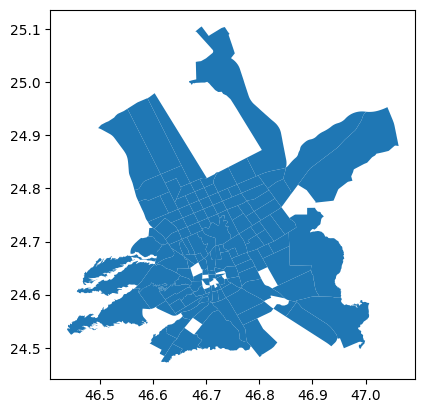

In [137]:
districts_gdf=gpd.read_file('RiyadhDistricts.topojson')
newmapped=data['district_english'].value_counts()

districts_gdf.plot()

In [133]:
disPri=df3[['district_english','السعر','المساحة']]
disPri2=df2[['district_english','السعر','المساحة']]
disPri3=data[['district_english','price','space sqm']]
disPri3.columns=['district_english','السعر','المساحة']
disPri=pd.concat([disPri,disPri2], ignore_index=True)
disPri=pd.concat([disPri,disPri3], ignore_index=True)

In [134]:
disPri=disPri.groupby('district_english').agg({
    'السعر': 'sum',
    'المساحة': 'sum'
}).reset_index()

In [135]:
disPri.sort_values('السعر', ascending=False)

district_english         السعر    المساحة
47         Al Nargas  4.259409e+09  858140.96
103         Qurtubah  3.360212e+09  412961.73
23          Al Malga  3.273299e+09  375576.85
59           Al Raid  2.768064e+09  946457.01
92           Hitteen  2.532067e+09  271679.59
..               ...           ...        ...
111          Ulaysha  6.124675e+06    6895.44
104      Salah Aldin  3.700000e+06     411.27
11         Al Foutah  2.850000e+06    1241.94
6          Al Deerah  1.700000e+06     719.22
106            Seyah  4.300000e+05     501.30

[115 rows x 3 columns]

In [140]:
disPri['avg_price_per_area'] = disPri['السعر'] / disPri['المساحة']

# Display the DataFrame with the new column
disPri = disPri.sort_values('السعر', ascending=False)
print(disPri)

# If you need to update another DataFrame (districts_gdf) with these values
for idx, row in districts_gdf.iterrows():
    if row['id'] in disPri['district_english'].values:
        avg_price = disPri.loc[disPri['district_english'] == row['id'], 'avg_price_per_area'].values[0]
        districts_gdf.at[idx, 'avg_price_per_area'] = avg_price

# Replace NaN values with 0 if needed
districts_gdf = districts_gdf.replace({'avg_price_per_area': {np.nan: 0}})

    district_english         السعر    المساحة  avg_price_per_area
47         Al Nargas  4.259409e+09  858140.96         4963.531009
103         Qurtubah  3.360212e+09  412961.73         8136.859474
23          Al Malga  3.273299e+09  375576.85         8715.391821
59           Al Raid  2.768064e+09  946457.01         2924.658654
92           Hitteen  2.532067e+09  271679.59         9320.050210
..               ...           ...        ...                 ...
111          Ulaysha  6.124675e+06    6895.44          888.221114
104      Salah Aldin  3.700000e+06     411.27         8996.522965
11         Al Foutah  2.850000e+06    1241.94         2294.796850
6          Al Deerah  1.700000e+06     719.22         2363.671756
106            Seyah  4.300000e+05     501.30          857.769799

[115 rows x 4 columns]


In [93]:
data['regionInRiyadh'].value_counts()

regionInRiyadh
وسط الرياض     2986
شمال الرياض    2482
غرب الرياض     2371
جنوب الرياض    1328
شرق الرياض      856
Name: count, dtype: int64

<Axes: >

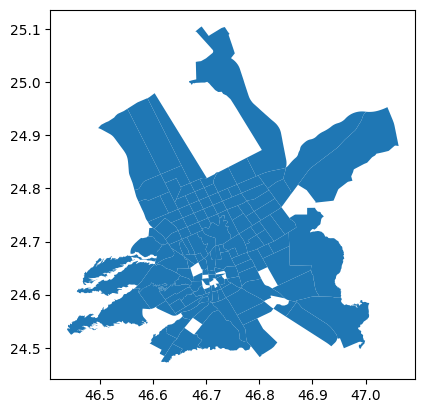

In [95]:
newmapped

district_english
Al Ared             657
Nammar              579
Al Nargas           409
Al Malga            382
Al Rimal            350
Laban               312
Al Mahdiah          293
Badr                266
Al Yasmeen          254
Tuwaiq              224
Al Mounasiah        195
Al Aziziyah         167
Qurtubah            156
Al Dar Al Baidaa    148
Hitteen             130
Al Naseem           128
Al Uraija           124
Al Natheem          123
Yamamah             101
Al Yarmouk           90
Hazim                84
Al Nahdah            74
Al Rawabi            71
Al Hamra             68
Shafa                66
Al Sahafa            56
Al Khaleej           53
Al Akeek             47
Al Malaz             43
Al Rayan             41
Al Nada              39
Al Wadi              34
Shobra               26
Al Shimaisi          24
Al Salam             22
Al Nafal             22
Ghernata             21
Al Rabia             18
Derihmiyah           17
Ghairawan            15
Mansora              10

In [96]:
df3['district_english'].unique()

array(['Al Badiah', 'Derihmiyah', 'Shafa', 'Al Aziziyah', 'Al Andalus',
       'Al Uraija', 'Al Rimal', 'Al Ared', 'Al Qadisiyah', 'Al Mather',
       'Al Quds', None, 'Al Malga', 'Al Natheem', 'Al Mounasiah',
       'Al Sahafa', 'Al Dar Al Baidaa', 'Al Farook', 'Al Akeek',
       'Al Mahdiah', 'Tuwaiq', 'Second Industrial City in Riyadh', 'Badr',
       'Laban', 'Al Mursalat', 'Shobra', 'Okadh', 'Um Al Hamam Al Sharqi',
       'Al Waha', 'Nammar', 'Al Rawabi', 'Al Saadah', 'Al Silay',
       'Al Morooj', 'Al Naseem', 'Al Rabia', 'Al Nargas', 'Qurtubah',
       'Al Raid', 'Al Rabwa', 'Al Malik Faisal', nan, 'Al Safaa',
       'Al Shimaisi', 'Al Izdihar', 'Al Rayan', 'Al Salam',
       'Al Rahmaniyah', 'Alzahrah', 'Al Olaya', 'Al Malaz', 'Al Khaleej',
       'Yamamah', 'Al Yasmeen', 'Al Nahdah', 'Al Mohamadiyah', 'Manfuha',
       'Al Nafal', 'Al Swaidi', 'Al Malik Fahad', 'Al Manakh',
       'Al Nakheel', 'Hazim', 'Ishbayliyah', 'Hitteen', 'Al Yarmouk',
       'Al Jinadiriyah', 'Al Man

In [97]:
newmap2=df2['district_english'].value_counts()
newmap2

district_english
Al Ared            673
Nammar             494
Al Nargas          481
Badr               316
Hitteen            257
                  ... 
Salah Aldin          2
Al Namodhajiyah      2
Al Wesham            2
Ulaysha              2
Al Deerah            1
Name: count, Length: 113, dtype: int64

In [98]:
newmap3=df3['district_english'].value_counts()
newmap3

district_english
Al Ared              1211
Nammar                907
Badr                  704
Al Nargas             642
Al Rimal              567
                     ... 
Al Malik Abdullah       3
Al Deerah               3
Al Shuhada              3
Al Foutah               3
Al Namodhajiyah         1
Name: count, Length: 112, dtype: int64

In [99]:
import numpy as np # Import numpy to use np.nan

for idx, row in districts_gdf.iterrows():
    if row['id'] in newmapped.index:
        districts_gdf.at[idx, 'count'] = newmapped[row['id']]
districts_gdf=districts_gdf.replace({'count': {np.nan: 0}})

# for idx, row in data.iterrows():
#     if row['district_english'] in newmapped.index:
#         districts_gdf.at[idx, 'Region'] = row['regionInRiyadh']
# districts_gdf=districts_gdf.replace({'count': {np.nan: 0}})

In [100]:
districts_gdf

id  \
0                            Al Amal   
1                    Al Namodhajiyah   
2    First Industrial City in Riyadh   
3                 Manfuha Al Jadeeda   
4                          Al Deerah   
..                               ...   
129                             Badr   
130                       Al Mahdiah   
131             King Saud University   
132              Al Naseem Al Gharbi   
133                       Al Mishael   

                                              geometry  count  
0    POLYGON ((46.73324 24.64690, 46.73320 24.64676...    0.0  
1    POLYGON ((46.70228 24.65018, 46.70140 24.64939...    0.0  
2    POLYGON ((46.76000 24.64062, 46.76191 24.63423...    0.0  
3    POLYGON ((46.72832 24.61090, 46.72810 24.61081...    0.0  
4    POLYGON ((46.71780 24.63793, 46.71777 24.63752...    0.0  
..                                                 ...    ...  
129  POLYGON ((46.77731 24.51045, 46.77743 24.51023...  266.0  
130  POLYGON ((46.60581 24.66843, 46.60579 24.66831...  293.0  
131  POLYGON ((46.63367 24.73531, 46.63399 24.73504...    0.0  
132  POLYGON ((46.84823 24.71317, 46.84437 24.71077...    0.0  
133  POLYGON ((46.91336 24.59644, 46.90313 24.59649...    0.0  

[134 rows x 3 columns]

In [101]:
import folium
districts_gdf.set_crs(epsg=4326, inplace=True)
# Create a map centered around Riyadh
m = folium.Map(location=[24.7136, 46.6753], zoom_start=11)  # Adjust the location coordinates as necessary

# Add a choropleth layer
folium.Choropleth(
    geo_data=districts_gdf,
    name='Choropleth',
    data=districts_gdf,
    columns=['id', 'count'],
    key_on='feature.properties.id',
    fill_color='OrRd',  # Choose a color palette
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Count Data Heatmap'
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save and show the map
m.save('riyadh_districts_heatmap.html')
m


In [102]:
districts_gdf.sort_values('count', ascending=False)

id                                           geometry  \
124             Al Ared  POLYGON ((46.65329 24.84306, 46.62974 24.83316...   
52               Nammar  POLYGON ((46.70530 24.58615, 46.70528 24.58594...   
125           Al Nargas  POLYGON ((46.70118 24.81936, 46.70075 24.81914...   
121            Al Malga  POLYGON ((46.62239 24.81019, 46.62342 24.80815...   
127            Al Rimal  POLYGON ((46.85008 24.83944, 46.84977 24.83926...   
..                  ...                                                ...   
40             Al Rabwa  POLYGON ((46.77348 24.69469, 46.77356 24.69449...   
39           Al Wazarat  POLYGON ((46.71821 24.66700, 46.71808 24.66699...   
38   Al Malik Abdulaziz  POLYGON ((46.74659 24.70505, 46.74625 24.70484...   
37          Salah Aldin  POLYGON ((46.70886 24.73291, 46.70868 24.73257...   
133          Al Mishael  POLYGON ((46.91336 24.59644, 46.90313 24.59649...   

     count  
124  657.0  
52   579.0  
125  409.0  
121  382.0  
127  350.0  
..     ...  
40     0.0  
39     0.0  
38     0.0  
37     0.0  
133    0.0  

[134 rows x 3 columns]

In [150]:
# Ensure the 'count' column exists and initialize if not
if 'count' not in districts_gdf.columns:
    districts_gdf['count'] = 0

# Ensure that the counts from newmap2 and newmap3 are added to the existing counts in districts_gdf
# Convert newmap2 and newmap3 to series with the district id as the index if not already
newmap2_series = pd.Series(newmap2) if isinstance(newmap2, dict) else newmap2
newmap3_series = pd.Series(newmap3) if isinstance(newmap3, dict) else newmap3

# Add counts from newmap2 and newmap3 using .map(), adding to existing counts
districts_gdf['count'] += districts_gdf['id'].map(newmap2_series).fillna(0)
districts_gdf['count'] += districts_gdf['id'].map(newmap3_series).fillna(0)


In [104]:
districts_gdf[districts_gdf['id']=='Al Namodhajiyah']['count'].sum()

3.0

In [105]:
''','''

','

In [106]:
districts_gdf.sort_values('count', ascending=False)

id                                           geometry  \
124              Al Ared  POLYGON ((46.65329 24.84306, 46.62974 24.83316...   
52                Nammar  POLYGON ((46.70530 24.58615, 46.70528 24.58594...   
125            Al Nargas  POLYGON ((46.70118 24.81936, 46.70075 24.81914...   
129                 Badr  POLYGON ((46.77731 24.51045, 46.77743 24.51023...   
127             Al Rimal  POLYGON ((46.85008 24.83944, 46.84977 24.83926...   
..                   ...                                                ...   
71   Al Naseem Al Sharqi  POLYGON ((46.85674 24.74427, 46.85674 24.74427...   
79             Al Roudah  POLYGON ((46.77452 24.74703, 46.77648 24.74440...   
82       Dhrat Al Badiah  POLYGON ((46.67921 24.60591, 46.67835 24.60529...   
85              Mansorah  POLYGON ((46.78428 24.50281, 46.78416 24.50297...   
0                Al Amal  POLYGON ((46.73324 24.64690, 46.73320 24.64676...   

      count  
124  2541.0  
52   1980.0  
125  1532.0  
129  1286.0  
127  1130.0  
..      ...  
71      0.0  
79      0.0  
82      0.0  
85      0.0  
0       0.0  

[134 rows x 3 columns]

In [152]:
import folium

# Ensure the CRS is set correctly
districts_gdf.set_crs(epsg=4326, inplace=True)

# Create a map centered around Riyadh
m = folium.Map(location=[24.7136, 46.6753], zoom_start=11)  # Adjust the location coordinates as necessary

# Define thresholds for color changes every 100 units
max_count = districts_gdf['count'].max()
step = 20
thresholds = list(range(0, int(max_count + step), step))

# Add a choropleth layer
folium.Choropleth(
    geo_data=districts_gdf,
    name='Choropleth',
    data=districts_gdf,
    columns=['id', 'count'],
    key_on='feature.properties.id',
    fill_color='YlOrRd',  # Choose a color palette
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Data Heatmap',
    threshold_scale=thresholds  # Set custom thresholds
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save and show the map
m.save('countriyadh_districts_heatmap2.html')
m


In [148]:
import folium

# Ensure the CRS is set correctly
districts_gdf.set_crs(epsg=4326, inplace=True)

# Create a map centered around Riyadh
m = folium.Map(location=[24.7136, 46.6753], zoom_start=11)  # Adjust the location coordinates as necessary

# Define thresholds for color changes every 100 units
max_count = districts_gdf['avg_price_per_area'].max()
step = 150
thresholds = list(range(0, int(max_count + step), step))

# Add a choropleth layer
folium.Choropleth(
    geo_data=districts_gdf,
    name='Choropleth',
    data=districts_gdf,
    columns=['id', 'avg_price_per_area'],
    key_on='feature.properties.id',
    fill_color='YlOrRd',  # Choose a color palette
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Data Heatmap',
    threshold_scale=thresholds  # Set custom thresholds
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save and show the map
m.save('pricesriyadh_districts_heatmap2.html')
m


In [ ]:
districts_gdf['count'].sum()

In [ ]:
print(districts_gdf[districts_gdf['count'].isna()])


id  \
0                            Al Amal   
1                    Al Namodhajiyah   
2    First Industrial City in Riyadh   
3                 Manfuha Al Jadeeda   
4                          Al Deerah   
..                               ...   
129                             Badr   
130                       Al Mahdiah   
131             King Saud University   
132              Al Naseem Al Gharbi   
133                       Al Mishael   

                                              geometry   count  
0    POLYGON ((46.73324 24.64690, 46.73320 24.64676...     0.0  
1    POLYGON ((46.70228 24.65018, 46.70140 24.64939...     3.0  
2    POLYGON ((46.76000 24.64062, 46.76191 24.63423...    10.0  
3    POLYGON ((46.72832 24.61090, 46.72810 24.61081...     0.0  
4    POLYGON ((46.71780 24.63793, 46.71777 24.63752...     4.0  
..                                                 ...     ...  
129  POLYGON ((46.77731 24.51045, 46.77743 24.51023...  1286.0  
130  POLYGON ((46.60581 24.66843, 46.60579 24.66831...   858.0  
131  POLYGON ((46.63367 24.73531, 46.63399 24.73504...     0.0  
132  POLYGON ((46.84823 24.71317, 46.84437 24.71077...     0.0  
133  POLYGON ((46.91336 24.59644, 46.90313 24.59649...    29.0  

[134 rows x 3 columns]

In [110]:
data

city/district    dealID dealDate(Georgan) dealDate(Hijri)  \
0          الرياض/عريض  20289169        2023/07/01         1444/12   
1          الرياض/نمار  20289165        2023/07/01         1444/12   
2         الرياض/الخير  20289297        2023/07/01         1444/12   
3           الرياض/بدر  20290020        2023/07/02         1444/12   
4         الرياض/الخير  20290338        2023/07/02         1444/12   
...                ...       ...               ...             ...   
10018      الرياض/طويق  21103150        2023/09/30         1445/01   
10019      الرياض/عريض  21103336        2023/09/30         1445/01   
10020  الرياض/الياسمين  21102956        2023/09/30         1445/01   
10021      الرياض/نمار  21102536        2023/09/30         1445/01   
10022    الرياض/النرجس  21103358        2023/09/30         1445/01   

      estateCategory estateType  estateQty      price  space sqm  district  \
0               سكني   قطعة أرض          1   300000.0     450.00      عريض   
1               سكني   قطعة أرض          1   430000.0     300.00      نمار   
2               سكني   قطعة أرض          1   445000.0     403.00     الخير   
3               سكني        شقة          1   501600.0     138.30       بدر   
4               سكني   قطعة أرض          1   450000.0     412.50     الخير   
...              ...        ...        ...        ...        ...       ...   
10018           سكني        شقة          1   570000.0     150.01      طويق   
10019           سكني   قطعة أرض          1   200000.0     225.00      عريض   
10020           سكني        شقة          1   917000.0     135.62  الياسمين   
10021          تجاري   قطعة أرض          1   950000.0     750.00      نمار   
10022           سكني   قطعة أرض          1  2648976.0     551.87    النرجس   

      regionInRiyadh district_english  
0         وسط الرياض          Al Ared  
1        جنوب الرياض           Nammar  
2        شمال الرياض             None  
3        جنوب الرياض             Badr  
4        شمال الرياض             None  
...              ...              ...  
10018     وسط الرياض           Tuwaiq  
10019     وسط الرياض          Al Ared  
10020    شمال الرياض       Al Yasmeen  
10021    جنوب الرياض           Nammar  
10022    شمال الرياض        Al Nargas  

[10023 rows x 12 columns]

In [ ]:
avg_prices_space_by_region = data.groupby('district_').agg({
    'price': 'mean',
    'space sqm': 'mean'
}).reset_index()
avg_prices_space_by_region['price']=avg_prices_space_by_region['price']
avg_prices_space_by_region

In [ ]:
#clipped_grid_gdf['manual_data']=srData['count']

In [ ]:
clipped_grid_gdf.index


In [ ]:
clipped_grid_gdf['region']=['South','West','South','center','South','north','West','East','center','East','north','East']
clipped_grid_gdf['avgPriceperMeter']=0
clipped_grid_gdf.loc[clipped_grid_gdf['region']=='South', 'avgPriceperMeter'] = avg_prices_space_by_region.iloc[0].price / avg_prices_space_by_region.iloc[0]['space sqm']
clipped_grid_gdf.loc[clipped_grid_gdf['region']=='West', 'avgPriceperMeter'] = avg_prices_space_by_region.iloc[3].price / avg_prices_space_by_region.iloc[3]['space sqm']
clipped_grid_gdf.loc[clipped_grid_gdf['region']=='north', 'avgPriceperMeter'] = avg_prices_space_by_region.iloc[2].price / avg_prices_space_by_region.iloc[2]['space sqm']
clipped_grid_gdf.loc[clipped_grid_gdf['region']=='East', 'avgPriceperMeter'] = avg_prices_space_by_region.iloc[1].price / avg_prices_space_by_region.iloc[1]['space sqm']
clipped_grid_gdf.loc[clipped_grid_gdf['region']=='center', 'avgPriceperMeter'] = avg_prices_space_by_region.iloc[4].price / avg_prices_space_by_region.iloc[4]['space sqm']
clipped_grid_gdf

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
clipped_grid_gdf.plot(column='avgPriceperMeter', ax=ax, legend=True, cmap='viridis', edgecolor='black')
polygon_gdf.boundary.plot(ax=ax, color='red', linewidth=2)

# Annotate each cell with its manual data
for idx, row in clipped_grid_gdf.iterrows():
    plt.annotate(text=int(row['avgPriceperMeter']), xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Grid with Manual Data over Riyadh')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import box

# Create a map centered around the centroid of the Riyadh polygon
m = folium.Map(location=[riyadh_polygon.centroid.y, riyadh_polygon.centroid.x], zoom_start=10)
colors = ['green', 'blue', 'red', 'yellow', 'purple']

# Add the grid cells to the map with popups
for idx, row in clipped_grid_gdf.iterrows():
    geo_json = gpd.GeoSeries([row['geometry']]).__geo_interface__
    region = row['region'].lower()  # normalize region to lower case to match conditions
    color_map = {'centeral': 'green', 'west': 'blue', 'south': 'red', 'east': 'yellow', 'north': 'purple'}
    color = color_map.get(region, 'grey')  # default to grey if region not found

    folium.GeoJson(
        geo_json,
        style_function=lambda feature, color=color: {  # pass color to lambda
            'fillColor': color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5,
        },
        highlight_function=lambda feature: {
            'fillColor': 'yellow',
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0.7,
        },
        tooltip=folium.Tooltip(f"Region: {row['region']}, Average price per meter: {row['avgPriceperMeter']}")
    ).add_to(m)

# Save the map to an HTML file
m.save('riyadh_grid_interactive.html')

# Display the map in the notebook (if running in a Jupyter environment)
m


KeyError: 'region'

In [ ]:
riyadhDist=gpd.read_file('RiyadhDistricts.topojson')
riyadhDist.plot()

In [89]:
import folium

# Initialize the map centered around Riyadh (example coordinates)
m = folium.Map(location=[24.7136, 46.6753], zoom_start=11)

# Add GeoJSON layers with popups
for idx, row in districts_gdf.iterrows():
    geo_json = folium.GeoJson(
        data=row['geometry'].__geo_interface__,
        style_function=lambda x: {'fillColor': 'blue', 'color': 'black', 'weight': 2, 'fillOpacity': 0.6}
    )

    # Create a popup
    popup_text = f"ID: {row['id']}<br>Count: {row['count']}"
    popup = folium.Popup(popup_text, max_width=300)

    geo_json.add_child(popup)
    m.add_child(geo_json)

# Save and show the map
m.save('map_with_popups.html')
m


In [ ]:
manual_values

# NOOOWWWWWWWW to the sectors

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads

# Load GeoJSON data (assuming it's in WKT format)
riyadh_map = pd.read_csv('riyadh_regions.csv')

# Convert the WKT geometry to a shapely geometry
riyadh_map['geometry'] = riyadh_map['geometry'].apply(loads)

# Extract Riyadh geometry
riyadh_polygon = riyadh_map[riyadh_map['shapeName'] == 'Riyadh']['geometry'].iloc[0]

# Create a GeoDataFrame for Riyadh polygon
polygon_gdf = gpd.GeoDataFrame({'geometry': [riyadh_polygon]}, crs='EPSG:4326')

# Plot the boundary to ensure it's correct
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
polygon_gdf.boundary.plot(ax=ax, color='red')
plt.title('Boundary of Riyadh City')
plt.axis('off')
plt.show()


In [ ]:
from shapely.geometry import Point

# Manually assign points for the regions
points = [
    Point(46.7, 24.98),  # North
    Point(46.9, 24.35),  # South
    Point(47.5, 24.7),   # East
    Point(46.5, 24.6),   # West
    Point(47.1, 24.7)    # Center
]

# Ensure points are within the polygon
points = [point for point in points if point.within(riyadh_polygon)]

# Create a GeoDataFrame for the points
points_gdf = gpd.GeoDataFrame({'geometry': points}, crs='EPSG:4326')

# Plot the points
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
polygon_gdf.boundary.plot(ax=ax, color='red')
points_gdf.plot(ax=ax, color='blue')
plt.title('Manually Assigned Points for Voronoi Regions')
plt.axis('off')
plt.show()


In [ ]:
from scipy.spatial import Voronoi
import numpy as np
from shapely.geometry import Polygon

# Create a Voronoi diagram from the points
vor = Voronoi(np.array([(point.x, point.y) for point in points]))

# Create Voronoi polygons
voronoi_regions = []
for region in vor.regions:
    if not -1 in region and len(region) > 0:
        polygon = Polygon([vor.vertices[i] for i in region])
        if polygon.is_valid:
            voronoi_regions.append(polygon)

# Clip the Voronoi polygons to the polygon boundary
clipped_voronoi_regions = [polygon.intersection(riyadh_polygon) for polygon in voronoi_regions]
clipped_voronoi_regions = [region for region in clipped_voronoi_regions if not region.is_empty]

# Create a GeoDataFrame for the clipped regions
clipped_regions_gdf = gpd.GeoDataFrame({'geometry': clipped_voronoi_regions}, crs='EPSG:4326')

# Assign labels to the regions
clipped_regions_gdf['region'] = ['North', 'South', 'East', 'West', 'Center'][:len(clipped_regions_gdf)]


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Add dummy data to the regions
clipped_regions_gdf['dummy_data'] = range(len(clipped_regions_gdf))  # Add sequential dummy data

# Convert GeoDataFrame to GeoJSON for Plotly
geojson = clipped_regions_gdf.to_json()

# Create Plotly figure
fig = px.choropleth_mapbox(
    clipped_regions_gdf,
    geojson=geojson,
    locations=clipped_regions_gdf.index,
    color="dummy_data",
    hover_name="region",
    hover_data={"region": True, "dummy_data": True},
    mapbox_style="carto-positron",
    center={"lat": 24.7, "lon": 46.7},
    zoom=9,
    opacity=0.5,
)

# Add the boundary of Riyadh
boundary_lat = list(polygon_gdf.geometry.boundary[0].xy[1])
boundary_lon = list(polygon_gdf.geometry.boundary[0].xy[0])

fig.add_trace(
    go.Scattermapbox(
        mode="lines",
        lat=boundary_lat,
        lon=boundary_lon,
        line=dict(width=4, color='red'),
        name="Riyadh Boundary"
    )
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [ ]:
from shapely.geometry import Polygon

# Create Voronoi polygons
voronoi_regions = []
for region in vor.regions:
    if not -1 in region and len(region) > 0:
        polygon = Polygon([vor.vertices[i] for i in region])
        if polygon.is_valid:
            voronoi_regions.append(polygon)

# Clip the Voronoi polygons to the polygon boundary
clipped_voronoi_regions = [polygon.intersection(riyadh_polygon) for polygon in voronoi_regions]
clipped_voronoi_regions = [region for region in clipped_voronoi_regions if not region.is_empty]

# Create a GeoDataFrame for the clipped regions
clipped_regions_gdf = gpd.GeoDataFrame({'geometry': clipped_voronoi_regions}, crs='EPSG:4326')

# Ensure exactly 5 regions
while len(clipped_regions_gdf) < 5:
    clipped_regions_gdf = pd.concat([clipped_regions_gdf, clipped_regions_gdf.iloc[[0]]])

# Assign labels to the regions
clipped_regions_gdf['region'] = ['North', 'South', 'East', 'West', 'Center'][:len(clipped_regions_gdf)]


In [ ]:
# Add dummy data to the regions
clipped_regions_gdf['dummy_data'] = range(len(clipped_regions_gdf))  # Add sequential dummy data

# Plot the regions with dummy data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
clipped_regions_gdf.plot(column='dummy_data', ax=ax, legend=True, cmap='viridis', edgecolor='black')
polygon_gdf.boundary.plot(ax=ax, color='red', linewidth=2)

# Annotate each region with its label
for idx, row in clipped_regions_gdf.iterrows():
    plt.annotate(text=row['region'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Voronoi Regions with Dummy Data over Riyadh')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
from shapely.geometry import Point, MultiPoint

# Generate random points within the bounding box of the polygon
num_points = 5
minx, miny, maxx, maxy = riyadh_polygon.bounds
points = MultiPoint([Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy)) for _ in range(num_points)])

# Filter points to only include those within the polygon
points = MultiPoint([point for point in points if point.within(riyadh_polygon)])

# Ensure we have exactly 5 points (for five regions)
while len(points) < 5:
    new_point = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
    if new_point.within(riyadh_polygon):
        points = MultiPoint(list(points) + [new_point])

# Create a GeoDataFrame for the points
points_gdf = gpd.GeoDataFrame({'geometry': points}, crs='EPSG:4326')

# Plot the points
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
polygon_gdf.boundary.plot(ax=ax, color='red')
points_gdf.plot(ax=ax, color='blue')
plt.title('Points for Voronoi Regions')
plt.axis('off')
plt.show()


In [ ]:
# Get the bounding box and centroid of the polygon
minx, miny, maxx, maxy = riyadh_polygon.bounds
centroid = riyadh_polygon.centroid

# Define the regions as polygons based on the centroid
north_polygon = Polygon([(minx, centroid.y), (maxx, centroid.y), (maxx, maxy), (minx, maxy)])
south_polygon = Polygon([(minx, miny), (maxx, miny), (maxx, centroid.y), (minx, centroid.y)])
east_polygon = Polygon([(centroid.x, miny), (maxx, miny), (maxx, maxy), (centroid.x, maxy)])
west_polygon = Polygon([(minx, miny), (centroid.x, miny), (centroid.x, maxy), (minx, maxy)])
center_polygon = riyadh_polygon.intersection(Polygon([
    (centroid.x - (centroid.x - minx) / 2, centroid.y - (centroid.y - miny) / 2),
    (centroid.x + (maxx - centroid.x) / 2, centroid.y - (centroid.y - miny) / 2),
    (centroid.x + (maxx - centroid.x) / 2, centroid.y + (maxy - centroid.y) / 2),
    (centroid.x - (centroid.x - minx) / 2, centroid.y + (maxy - centroid.y) / 2)
]))

# Create a GeoDataFrame for the regions
regions_gdf = gpd.GeoDataFrame([
    {'region': 'North', 'geometry': north_polygon},
    {'region': 'South', 'geometry': south_polygon},
    {'region': 'East', 'geometry': east_polygon},
    {'region': 'West', 'geometry': west_polygon},
    {'region': 'Center', 'geometry': center_polygon}
], crs='EPSG:4326')

# Clip the regions to the polygon boundaries
clipped_regions_gdf = gpd.clip(regions_gdf, polygon_gdf)


In [ ]:
clipped_regions_gdf['dummy_data'] = range(len(clipped_regions_gdf))  # Add sequential dummy data


In [ ]:
# Plot the regions with dummy data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
clipped_regions_gdf.plot(column='dummy_data', ax=ax, legend=True, cmap='viridis', edgecolor='black')
polygon_gdf.boundary.plot(ax=ax, color='red', linewidth=2)

# Annotate each region with its dummy data
for idx, row in clipped_regions_gdf.iterrows():
    plt.annotate(text=row['region'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Regions with Dummy Data over Riyadh')
plt.axis('off')
plt.show()


Not my buisness

In [ ]:
grid_size=1
grid_size_deg=grid_size/111.0
minx ,miny, maxx, maxy=polygon.bounds
grid=[]
x=minx
while x<maxx:
    y=miny
    while y<maxy:
        cell=box(x,y,x+grid_size,y+grid_size)
        if cell.intersects(polygon):
            grid.append(cell)
        y+=grid_size_deg
    x+=grid_size_deg

In [ ]:
import pandas as pd

# Create a GeoDataFrame for the grid
grid_gdf = gpd.GeoDataFrame(grid, columns=['geometry'], crs='EPSG:4326')

# Add dummy data to the grid cells
grid_gdf['dummy_data'] = range(len(grid_gdf))  # Add sequential dummy data

# You can add more sophisticated dummy data if needed


In [ ]:
import matplotlib.pyplot as plt
# Plot the grid with dummy data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
grid_gdf.plot(column='dummy_data', ax=ax, legend=True, cmap='viridis', edgecolor='black')
polygon_gdf = gpd.GeoDataFrame([{'geometry': polygon}], crs='EPSG:4326')
polygon_gdf.boundary.plot(ax=ax, color='red', linewidth=2)

# Annotate each cell with its dummy data
for idx, row in grid_gdf.iterrows():
    plt.annotate(text='set',s=row['dummy_data'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Grid with Dummy Data')
plt.axis('off')
plt.show()
